<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2024-25

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 12th DECEMBER @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [3]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'CyberWaveSolutions'

### Function for loading data - do not change

In [5]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):

    email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
    file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
    web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
    login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
    usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
    employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
    
    email_data['datetime'] = pd.to_datetime(email_data['datetime'])
    file_data['datetime'] = pd.to_datetime(file_data['datetime'])
    web_data['datetime'] = pd.to_datetime(web_data['datetime'])
    login_data['datetime'] = pd.to_datetime(login_data['datetime'])
    usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])

    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_88086/270126188.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_88086/270126188.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_88086/270126188.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = pd.

### The following code samples may be useful to aid your investigation

In [7]:
# This shows the employee_data DataFrame
employee_data

,user,role,email,pc
0,usr-esz,Security,usr-esz@cyberwave-solutions.com,pc0
1,usr-idp,Security,usr-idp@cyberwave-solutions.com,pc1
2,usr-pum,Security,usr-pum@cyberwave-solutions.com,pc2
3,usr-dpa,Services,usr-dpa@cyberwave-solutions.com,pc3
4,usr-mnt,Security,usr-mnt@cyberwave-solutions.com,pc4
...,...,...,...,...
95,usr-dnm,Security,usr-dnm@cyberwave-solutions.com,pc95
96,usr-rjr,HR,usr-rjr@cyberwave-solutions.com,pc96
97,usr-pkd,HR,usr-pkd@cyberwave-solutions.com,pc97
98,usr-kba,Finance,usr-kba@cyberwave-solutions.com,pc98


In [8]:
# This shows the login_data DataFrame
login_data

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
1,2018-01-01 01:29:51,usr-dnm,login,pc95
2,2018-01-01 01:32:20,usr-nxa,login,pc9
3,2018-01-01 01:41:58,usr-pum,login,pc2
4,2018-01-01 01:46:17,usr-gtn,login,pc52
...,...,...,...,...
36195,2018-06-30 23:10:54,usr-dnm,logoff,pc95
36196,2018-06-30 23:13:54,usr-ayg,logoff,pc28
36197,2018-06-30 23:39:37,usr-ywt,logoff,pc66
36198,2018-06-30 23:52:53,usr-tss,logoff,pc26


In [9]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-iea']

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
176,2018-01-01 21:20:04,usr-iea,logoff,pc63
206,2018-01-02 01:41:59,usr-iea,login,pc63
388,2018-01-02 22:37:23,usr-iea,logoff,pc63
415,2018-01-03 02:38:55,usr-iea,login,pc63
...,...,...,...,...
35772,2018-06-28 21:09:50,usr-iea,logoff,pc63
35809,2018-06-29 02:06:00,usr-iea,login,pc63
35982,2018-06-29 21:26:24,usr-iea,logoff,pc63
36065,2018-06-30 08:34:54,usr-iea,login,pc63


In [10]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-iea'])]

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
176,2018-01-01 21:20:04,usr-iea,logoff,pc63
206,2018-01-02 01:41:59,usr-iea,login,pc63
388,2018-01-02 22:37:23,usr-iea,logoff,pc63
415,2018-01-03 02:38:55,usr-iea,login,pc63
...,...,...,...,...
35772,2018-06-28 21:09:50,usr-iea,logoff,pc63
35809,2018-06-29 02:06:00,usr-iea,login,pc63
35982,2018-06-29 21:26:24,usr-iea,logoff,pc63
36065,2018-06-30 08:34:54,usr-iea,login,pc63


In [11]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Security', 'Services', 'HR', 'Finance', 'Legal', 'Director',
       'Technical'], dtype=object)

In [12]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [13]:
# List all usernames that belong to the job role Finance
user_set['Finance']

['usr-kaa',
 'usr-lpx',
 'usr-xqz',
 'usr-lnl',
 'usr-ibv',
 'usr-ihi',
 'usr-vun',
 'usr-mgl',
 'usr-kbn',
 'usr-idz',
 'usr-snf',
 'usr-kba']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

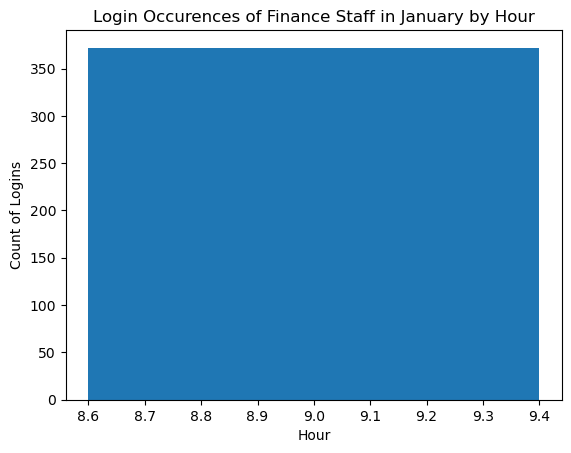

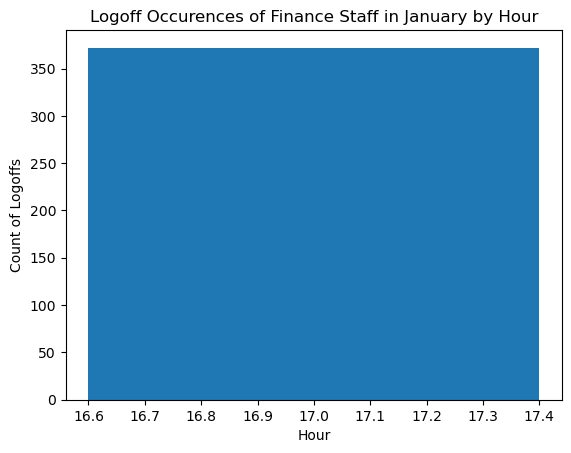

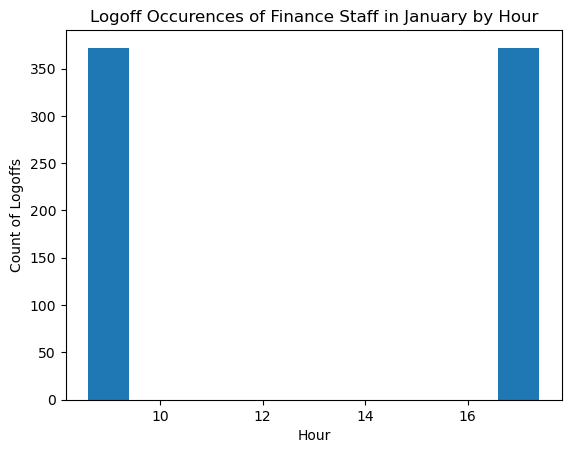

The time with the most frequent logins is: 9
The time with the most frequent logoffs is: 17
The time with the most frequent combination of login/logoff is: 9


In [15]:
######### ADD YOUR CODE HERE ##########
import numpy as np
#Split datetime into separate day and hour and month columns
januaryData = login_data.copy()
januaryData['hour'] = januaryData['datetime'].dt.hour
januaryData['month'] = januaryData['datetime'].dt.month

#Filter by month of january only
januaryData = januaryData[januaryData['month']==1]
#Filter by finance staff
januaryData = januaryData[januaryData['user'].isin(user_set['Finance'])]


#Group by hour and get login count and logoff count columns
loginData = januaryData[januaryData['action']=='login'].groupby('hour').count().reset_index()
logoffData = januaryData[januaryData['action']=='logoff'].groupby('hour').count().reset_index()
combinedLogoffLogin = januaryData.groupby('hour').count().reset_index()

#Bar chart that shows each hour and the log-on occurences
plt.bar(loginData['hour'], loginData['action'])
plt.title("Login Occurences of Finance Staff in January by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.show()

#Bar chart that shows each hour and the log-off occurences
plt.bar(logoffData['hour'], logoffData['action'])
plt.title("Logoff Occurences of Finance Staff in January by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logoffs")
plt.show()

#Bar chart that shows each hour with both log-on and log-off occurences combined
plt.bar(combinedLogoffLogin['hour'], combinedLogoffLogin['action'])
plt.title("Logoff Occurences of Finance Staff in January by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logoffs")
plt.show()

#Report the most common login and logoff time
mostFrequentLogin = loginData['hour'][loginData['action'].idxmax()]
mostFrequentLogoff = logoffData['hour'][logoffData['action'].idxmax()] 
mostFrequentLoginLogoff = combinedLogoffLogin['hour'][combinedLogoffLogin['action'].idxmax()] 
print("The time with the most frequent logins is:", mostFrequentLogin)
print("The time with the most frequent logoffs is:", mostFrequentLogoff)
print("The time with the most frequent combination of login/logoff is:", mostFrequentLoginLogoff)

### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



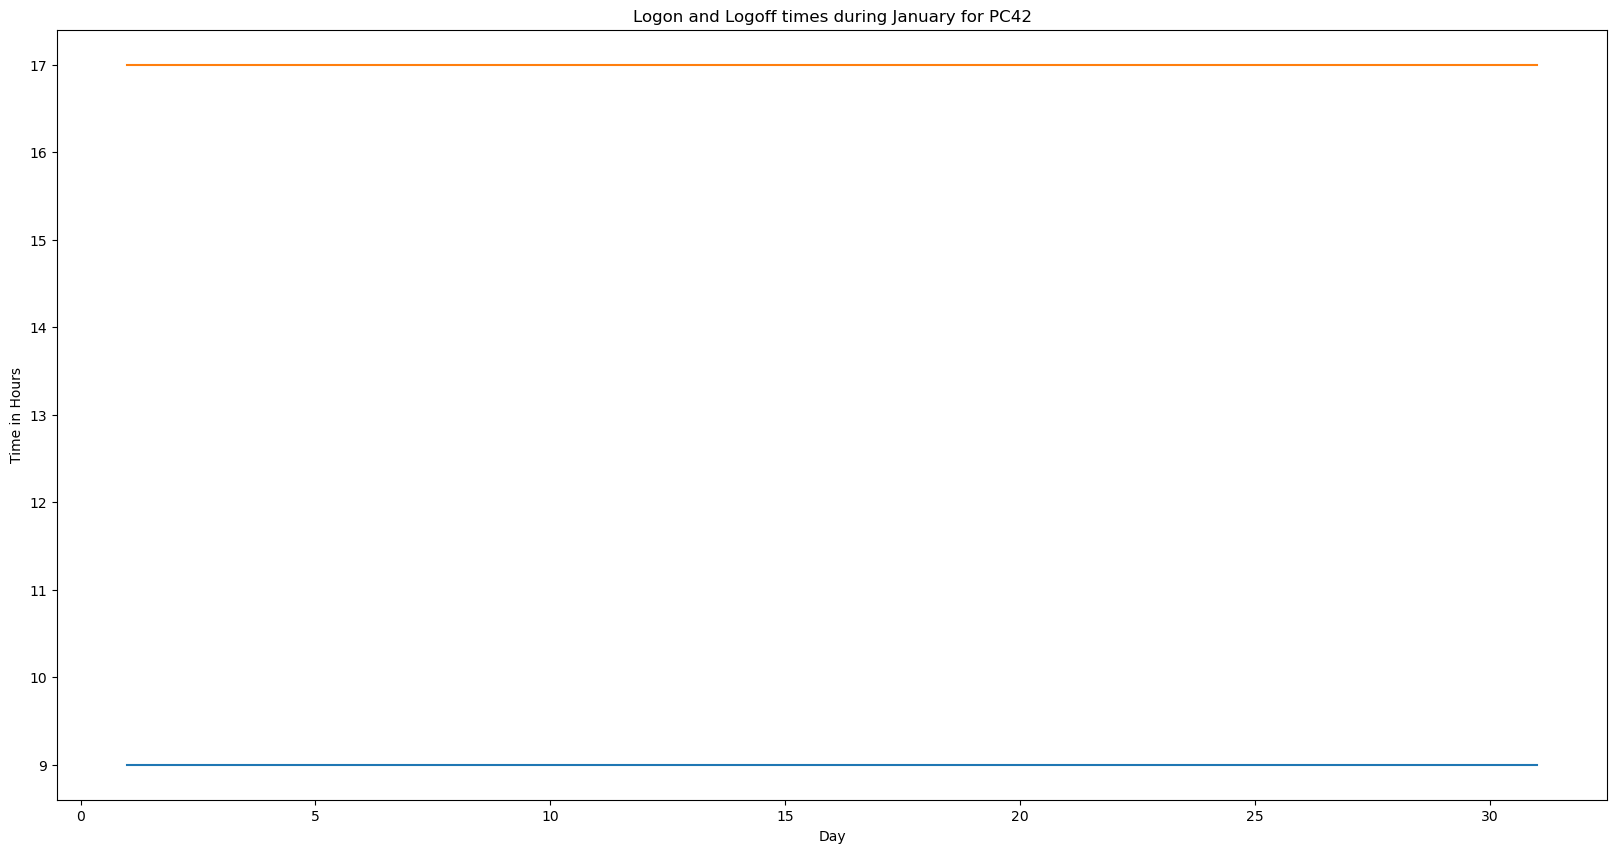

In [17]:
######### ADD YOUR CODE HERE ##########
#Filter data by pc42
onlyPC42 = login_data.copy()
onlyPC42['month'] = onlyPC42['datetime'].dt.month
onlyPC42['day'] = onlyPC42['datetime'].dt.day
onlyPC42['hour'] = onlyPC42['datetime'].dt.hour

onlyPC42 = onlyPC42[onlyPC42['pc']=='pc42']

#Filter by january
onlyPC42 = onlyPC42[onlyPC42['month']==1]

#Filter login and logoff respectively

onlyPC42Login = onlyPC42[onlyPC42['action']=='login']
onlyPC42Logoff = onlyPC42[onlyPC42['action']=='logoff']


plt.figure(figsize=(20,10))
#Plot log-on for pc42
plt.plot(onlyPC42Login['day'], onlyPC42Login['hour'], label="Login")
#Plot log-off for pc42
plt.plot(onlyPC42Logoff['day'], onlyPC42Logoff['hour'], label="Logoff")

plt.title("Logon and Logoff times during January for PC42")
plt.xlabel("Day")
plt.ylabel("Time in Hours")
plt.show()

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

In [19]:
######### ADD YOUR CODE HERE ##########

### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

In [21]:
######### ADD YOUR CODE HERE ##########

### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

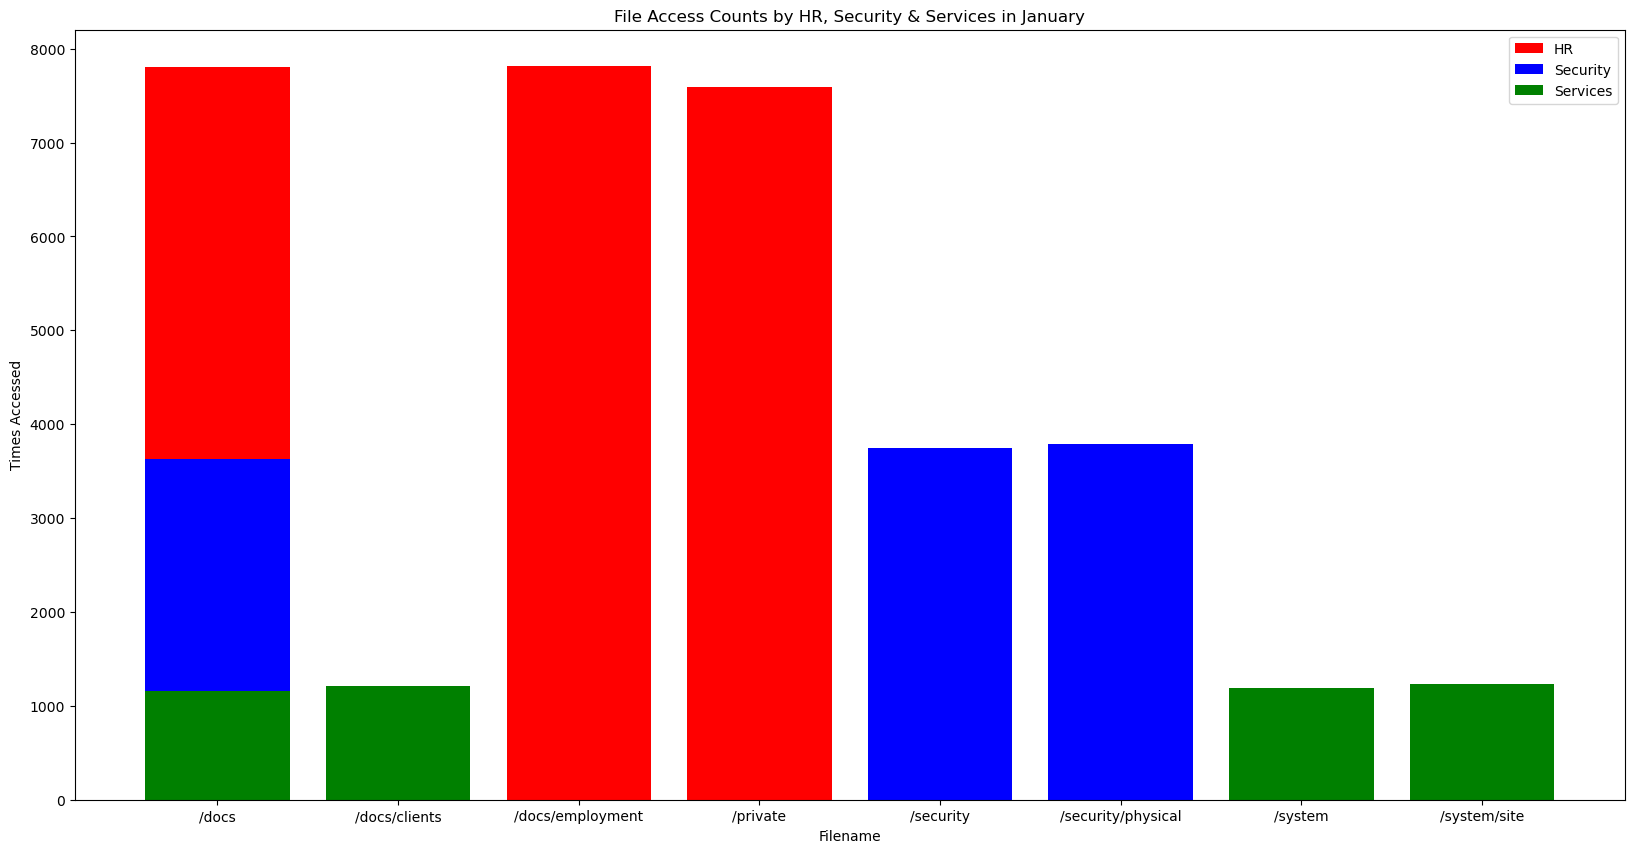

In [23]:
######### ADD YOUR CODE HERE ##########
#Filter file data by HR, Services and Security staff only
filteredFileData = file_data.copy()
combinedUserSet = user_set['HR'] + user_set['Services'] + user_set['Security']
filteredFileData = filteredFileData[filteredFileData['user'].isin(combinedUserSet)]

#Add the users role as a column
def getRole(user):
    if user in user_set['HR']:
        return 'HR'
    elif user in user_set['Services']:
        return 'Services'
    elif user in user_set['Security']:
        return 'Security'

#Apply getRole method
filteredFileData['role'] = filteredFileData['user'].apply(getRole)

#Filter file data by january
filteredFileData['month'] = filteredFileData['datetime'].dt.month
filteredFileData = filteredFileData[filteredFileData['month']==1]

#Get the count each role has accessed each file and add as column
filteredFileData = filteredFileData.groupby(['filename', 'role']).size().reset_index(name='timesaccessed')

#Filter by role
hrFileData= filteredFileData[filteredFileData['role'] == 'HR']
securityFileData = filteredFileData[filteredFileData['role'] == 'Security']
servicesFileData = filteredFileData[filteredFileData['role'] == 'Services']

#Get names of files accessed across all 3 roles
filenames = filteredFileData['filename'].unique()

#Reindex on all filenames filling those not accessed by a role with 0
#this is done so stacked bar chart can be plotted consistently if a role 
#hasn't accessed a file (e.g. /system is only accessed by services)
hrFileData = hrFileData.set_index('filename').reindex(filenames, fill_value=0)['timesaccessed'].reset_index()
securityFileData = securityFileData.set_index('filename').reindex(filenames, fill_value=0)['timesaccessed'].reset_index()
servicesFileData = servicesFileData.set_index('filename').reindex(filenames, fill_value=0)['timesaccessed'].reset_index()

#Plot stacked bar graph
plt.figure(figsize=(20,10))

#Plotting each bar with the label and colour
plt.bar(filenames, hrFileData['timesaccessed'], color='r', label='HR')
plt.bar(filenames, securityFileData['timesaccessed'], color='b', label='Security')
plt.bar(filenames, servicesFileData['timesaccessed'], color='g', label='Services')

plt.xlabel('Filename')
plt.ylabel('Times Accessed')
plt.title('File Access Counts by HR, Security & Services in January')
plt.legend()
plt.show()

### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

In [25]:
######### ADD YOUR CODE HERE ##########

### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)